# Stock Price Prediction

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the CSV file

In [2]:
stock_data = pd.read_csv('1613615-Stock_Price_data_set.csv')
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


## Basic information

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


### Observation
1. There are 7 columns. 5 columns float64 dtype, 1 column int64 and 1 object.
2. No null values.

First convert Date column to dtype datetime.

In [4]:
stock_data['Date'] = stock_data['Date'].astype('datetime64')
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


## Description of data
The <code>describe()</code> method gives more information on the numerical columns.

In [5]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Observation
1. Open, High, Low, Close, and Adj Close are closely related.

## Checking for duplicates
The <code>duplicated()</code> method tells whether there are any duplicates in the data.

In [6]:
stock_data.duplicated().sum()

0

### Observation
1. There are no duplicates in the data.

## Questions

### 1. How does <code>Open</code> vary over time?

<AxesSubplot:xlabel='Date'>

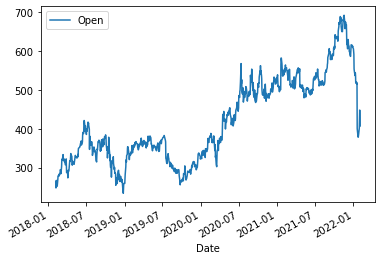

In [7]:
stock_data.plot(x='Date', y='Open')

### Observation
1. Values are mostly continuous. But some ups and downs.

### 2. How does <code>Volume</code> vary over time ?

<AxesSubplot:xlabel='Date'>

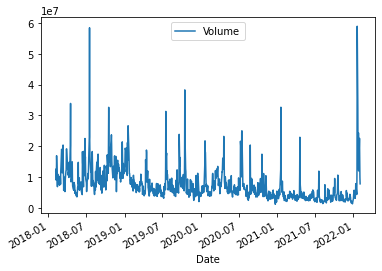

In [8]:
stock_data.plot(x='Date', y='Volume')

### Observation
1. The values in <code>Volume</code> column are highly unpredictable.

### 3. How is correlation between columns?

In [9]:
stock_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


### Observation
1. <code>Volume</code> column have low correlation with all other columns.
2. <code>Open</code>, <code>High</code>, <code>Low</code>, <code>Close</code> and <code>Adj. Close</code> are highly correlated.

## Train and Test Data

Previous 40 Open values used to predict future values

In [10]:
X = np.empty((969,40)) # Features
y = np.empty((969,))  # Target

for i in range(40,stock_data.shape[0]):
    X[i-40] = np.array(stock_data.iloc[i-40:i, 1]) # Store the last 40 'Open' values as features
    y[i-40] = stock_data.iloc[i, 1]                # Store the current 'Open' value as target

In [11]:
X.shape, y.shape

((969, 40), (969,))

Split the dataset into train and test datasets.

In [12]:
train_size = 800
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Model Building
We use the <code>LinearRegression</code> model.

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Fit the model.

In [14]:
model.fit(X_train, y_train)

LinearRegression()

Predict the targets for the test dataset.

In [15]:
y_pred = model.predict(X_test)

## Model Evaluation

We evaluate the model by using the <code>mean_absolute_error</code> function in the <code>sklearn.metrics</code> module. This gives the mean of how much the predicted value varies from the actual value.

### With train data

In [16]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train, model.predict(X_train))

7.341687704069627

### With test data.

In [17]:
mean_absolute_error(y_test, model.predict(X_test))

8.448454821227841

## Conclusion
A model to predict the future state of stock prices has been built. This model predict the future <code>Open</code> prices by using the past 40 prices as features.